# Create Clustering Using DBSCAN Algorithm On Wine Dataset

## Load Libraries

In [41]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from pandas_profiling import ProfileReport
%matplotlib inline
plt.style.use("dark_background")

## Load Dataset

In [42]:
df = pd.read_csv('./wine-clustering.csv')

In [43]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Dataset Exploration

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [45]:
df.shape

(178, 13)

In [46]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [47]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [48]:
columns=df.columns

In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [50]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'Alcohol'),
  Text(0, 1.5, 'Malic_Acid'),
  Text(0, 2.5, 'Ash'),
  Text(0, 3.5, 'Ash_Alcanity'),
  Text(0, 4.5, 'Magnesium'),
  Text(0, 5.5, 'Total_Phenols'),
  Text(0, 6.5, 'Flavanoids'),
  Text(0, 7.5, 'Nonflavanoid_Phenols'),
  Text(0, 8.5, 'Proanthocyanins'),
  Text(0, 9.5, 'Color_Intensity'),
  Text(0, 10.5, 'Hue'),
  Text(0, 11.5, 'OD280'),
  Text(0, 12.5, 'Proline')])

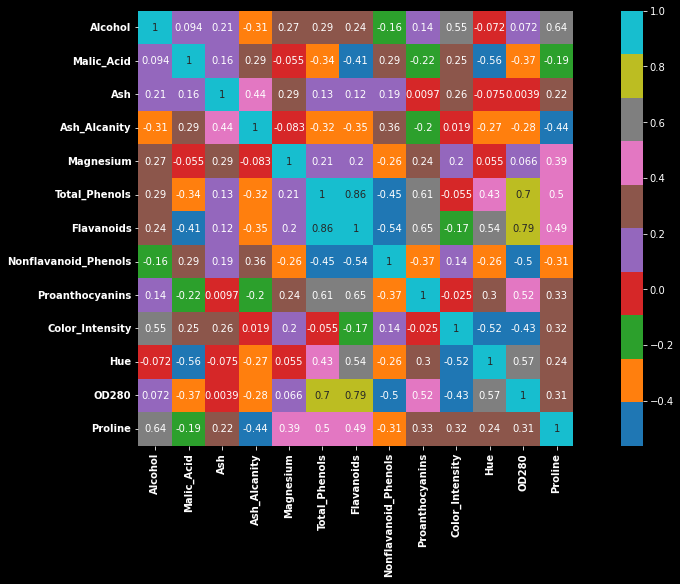

In [51]:
plt.style.use('dark_background')
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True,square=True,cmap='tab10')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

In [52]:
viz=ProfileReport(df,explorative=True)
viz.to_file('./wine-dataset-EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Scaling

In [53]:
scale=StandardScaler()
data=scale.fit_transform(df)

In [54]:
normal=MinMaxScaler()
data=normal.fit_transform(data)

In [55]:
pca=PCA(n_components=2)
data=pca.fit_transform(data)

In [56]:
df_new=pd.DataFrame(data,columns=['X','Y'])

In [57]:
df_new.describe()

,X,Y
count,1.780000e+02,1.780000e+02
mean,-1.995907e-17,-4.989766e-18
std,4.691398e-01,3.200950e-01
min,-8.357170e-01,-6.453058e-01
25%,-4.415270e-01,-2.539278e-01
50%,-5.710325e-02,-4.904096e-02
75%,4.662440e-01,2.823074e-01
max,9.152164e-01,7.775431e-01


## Select Parameters Value For Clustering

In [58]:
neighbours=NearestNeighbors(n_neighbors=4)
nbrs=neighbours.fit(df_new)
dis,ind=nbrs.kneighbors(df_new)

In [59]:
dis=np.sort(dis,axis=0)

In [60]:
dis=dis[:,-1]

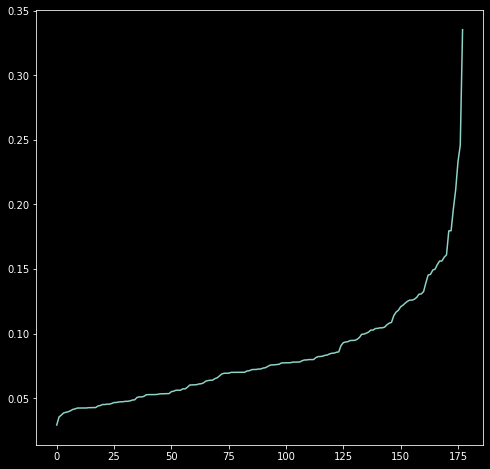

In [61]:
plt.figure(figsize=(8,8))
plt.plot(dis)

## DBSCAN Model

In [62]:
cluster=DBSCAN(eps=0.09,min_samples=4)
df_new['Label']=cluster.fit_predict(df_new)

In [63]:
df_new.head()

,X,Y,Label
0,-0.706336,-0.253193,-1
1,-0.484977,-0.008823,0
2,-0.521172,-0.189187,0
3,-0.821644,-0.580906,-1
4,-0.202546,-0.059467,1


## Plot The Clusters

<AxesSubplot:xlabel='X', ylabel='Y'>

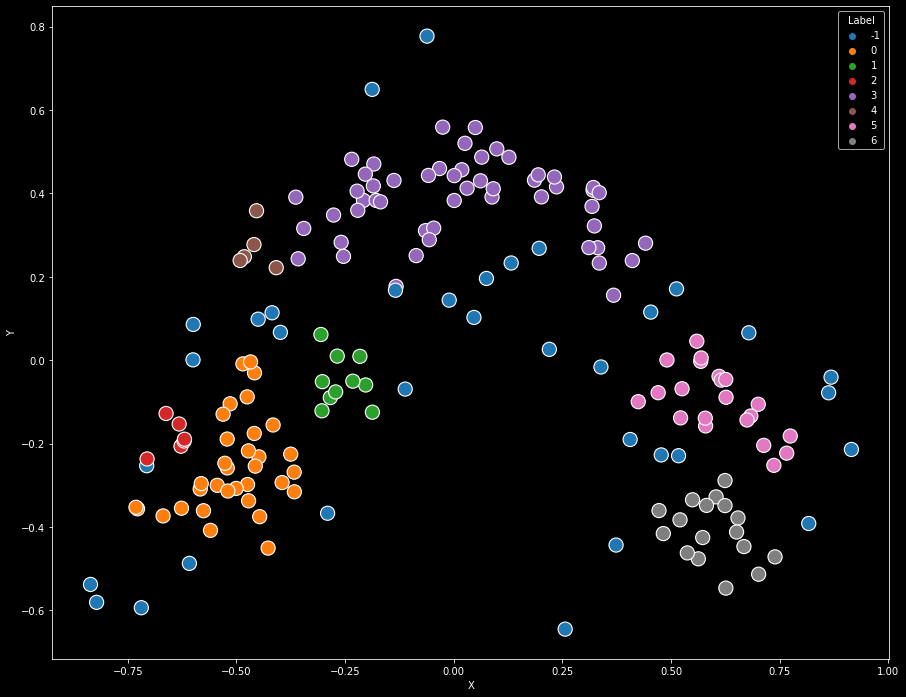

In [64]:
plt.figure(figsize=(15, 12))
sns.scatterplot(x='X',y='Y',data=df_new,hue='Label',palette='tab10',s=200)

In [65]:
df_new['Label'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6])